Raw data file does not exist. Fetching data...
JSON raw data saved to raw_folder\raw_47636_2024_3.json
CSV data saved to fix_folder\47636_2024_3.csv
CSV data file exists. Loading data...


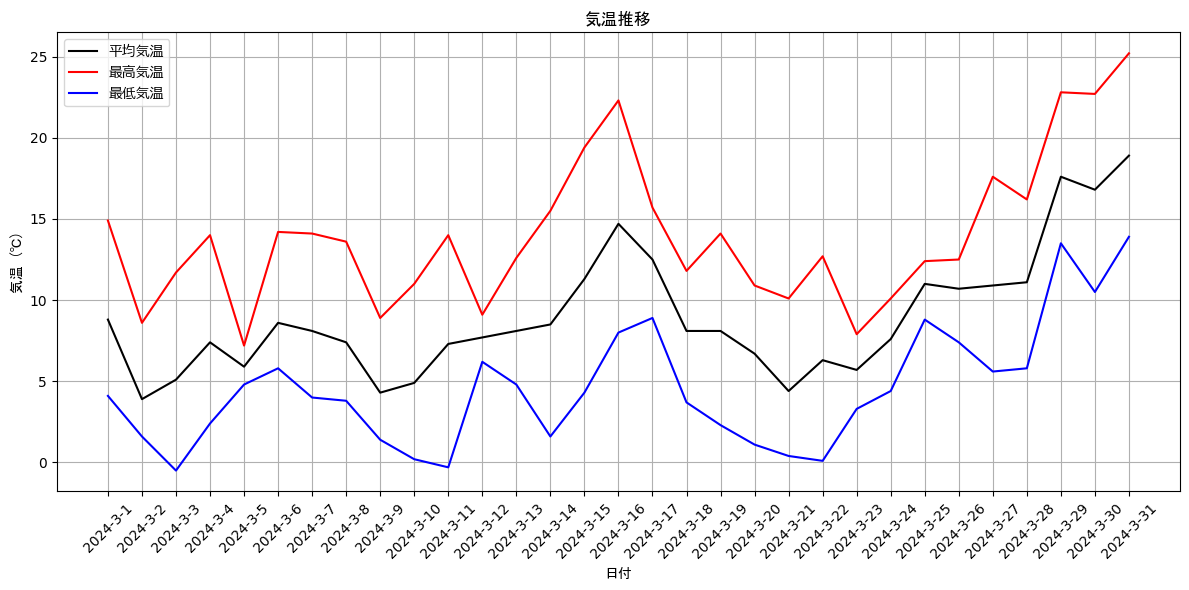

Temperature plot saved as 'temperature_plot.png'.


In [1]:
import requests
import json
import os
import csv
import pathlib
import matplotlib.pyplot as plt
import numpy as np

class WeatherDataManager:
    def __init__(self, number, year, month):
        self.number = number
        self.year = year
        self.month = month
        self.url_kako = "https://api.cultivationdata.net/past"
        
        self.raw_output_folder = 'raw_folder'
        self.fix_output_folder = 'fix_folder'
        self.raw_filename = f"raw_{self.number}_{self.year}_{self.month}.json"
        self.fix_filename = f"{self.number}_{self.year}_{self.month}.csv"
        self.raw_output_file = os.path.join(self.raw_output_folder, self.raw_filename)
        self.fix_output_file = os.path.join(self.fix_output_folder, self.fix_filename)
        
    def get_request_url(self):
        request_url = f"{self.url_kako}?no={self.number}&year={self.year}&month={self.month}"
        return request_url
    
    def fetch_data(self):
        request_url = self.get_request_url()
        response = requests.get(request_url)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Error fetching data: {response.status_code}")
            return None

    def save_raw_data(self, data):
        # ディレクトリが存在しない場合は作成
        os.makedirs(self.raw_output_folder, exist_ok=True)
        with open(self.raw_output_file, 'w', encoding='utf-8') as f:
            json.dump(data, f, indent=4, ensure_ascii=False)
        print(f"JSON raw data saved to {self.raw_output_file}")

    def load_raw_data(self):
        with open(self.raw_output_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        return data
    
    def check_and_load_data(self):
        if os.path.exists(self.raw_output_file):
            print("Raw data file exists.")
            data = self.load_raw_data()
        else:
            print("Raw data file does not exist. Fetching data...")
            data = self.fetch_data()
            if data:
                self.save_raw_data(data)
        return data

    def save_csv_data(self, data):
        os.makedirs(self.fix_output_folder, exist_ok=True)
        with open(self.fix_output_file, 'w', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['年月日', '平均気温', '最高気温', '最低気温'])

            chimei_keys = list(data.keys())[0]
            date_keys = list(data[chimei_keys].keys())
            for date in date_keys:
                ave_temp = data[chimei_keys][date]['平均気温']
                max_temp = data[chimei_keys][date]['最高気温']
                min_temp = data[chimei_keys][date]['最低気温']
                writer.writerow([date, ave_temp, max_temp, min_temp])
        
        print(f"CSV data saved to {self.fix_output_file}")

    def load_csv_data(self):
        if os.path.exists(self.fix_output_file):
            print("CSV data file exists. Loading data...")
            dates = []
            ave_temps = []
            max_temps = []
            min_temps = []
            with open(self.fix_output_file, 'r', encoding='utf-8') as f:
                reader = csv.DictReader(f)
                for row in reader:
                    dates.append(row['年月日'])
                    ave_temps.append(float(row['平均気温']))
                    max_temps.append(float(row['最高気温']))
                    min_temps.append(float(row['最低気温']))
            return dates, ave_temps, max_temps, min_temps
        else:
            print("CSV data file does not exist.")
            return None, None, None, None

def plot_temperature(dates, ave_temps, max_temps, min_temps):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, ave_temps, label='平均気温', color='black')
    plt.plot(dates, max_temps, label='最高気温', color='red')
    plt.plot(dates, min_temps, label='最低気温', color='blue')
    
    plt.title('気温推移',fontname='MS Gothic')
    plt.xlabel('日付',fontname='MS Gothic')
    plt.ylabel('気温 (℃)',fontname='MS Gothic')
    plt.xticks(rotation=45)
    plt.legend(prop = {"family" : "Meiryo"})
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('temperature_plot.png')
    plt.show()
    print("Temperature plot saved as 'temperature_plot.png'.")

# 実行部分
number = 47636
year = 2024
month = 3

weather_manager = WeatherDataManager(number, year, month)

# データの取得とCSVファイルへの保存
data = weather_manager.check_and_load_data()
if data:
    weather_manager.save_csv_data(data)

# CSVファイルからデータの読み込み
dates, ave_temps, max_temps, min_temps = weather_manager.load_csv_data()

# データが存在する場合はプロット
if dates and ave_temps and max_temps and min_temps:
    plot_temperature(dates, ave_temps, max_temps, min_temps)